In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("E://PHD/Course materials/Sem 1/Data Mining/Assignment/workspace/stock_price_trend_prediction/stock_price_pred_data_mining/Data/04_normalization_model_input/normalized_model_input.csv")

In [3]:
df.head(3)

,Date,stock_id,Open,High,Low,Close,Volume,MA7,MA21,EMA20,...,BB_upper,BB_middle,BB_lower,CCI_14,CMF_20,Stoch_K,Stoch_D,Momentum_10,Daily_Return,Log_Return
0,2021-12-14,ANANDRATHI,287.24,294.42,270.75,279.37,27861900.0,274.57858,284.5581,283.8015,...,257.13663,283.8015,310.46637,-4213.020993,-0.169092,80.29088,84.21576,-5.51,0.002398,0.002395
1,2021-12-15,ANANDRATHI,280.06,286.67,276.71,280.04,2675624.0,274.57858,284.5581,283.8015,...,257.13663,283.8015,310.46637,-4213.020993,-0.169092,80.29088,84.21576,-5.51,0.002398,0.002395
2,2021-12-16,ANANDRATHI,280.54,284.61,271.01,273.31,1329736.0,274.57858,284.5581,283.8015,...,257.13663,283.8015,310.46637,-4213.020993,-0.169092,80.29088,84.21576,-5.51,-0.024032,-0.024326


In [4]:
df.columns

Index(['Date', 'stock_id', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA7',
       'MA21', 'EMA20', 'EMA50', 'RSI_14', 'MACD', 'MACD_signal', 'MACD_hist',
       'BB_upper', 'BB_middle', 'BB_lower', 'CCI_14', 'CMF_20', 'Stoch_K',
       'Stoch_D', 'Momentum_10', 'Daily_Return', 'Log_Return'],
      dtype='object')

In [5]:
# Example: summarize each stock’s normalized indicators
cluster_features = (
    df
    .groupby('stock_id')
    .agg({
        'Close': ['mean', 'std', 'skew'],
        'Volume': ['mean', 'std'],
        'MA7': 'mean',
        'MA21': 'mean',
        'RSI_14': 'mean',
        'MACD': 'mean',
        'MACD_signal': 'mean',
        'EMA20': 'mean',
        'EMA50': 'mean',
        'BB_upper': 'mean',
        'BB_lower': 'mean',
        'CCI_14': 'mean',
        'CMF_20': 'mean',
        'Stoch_K': 'mean',
        'Stoch_D':'mean',
        'Momentum_10':'mean',
        'Log_Return':'mean'
    })
)

# Flatten multi-index columns
cluster_features.columns = ['_'.join(col) for col in cluster_features.columns]
cluster_features.reset_index(inplace=True)


In [34]:
X = cluster_features.drop("stock_id", axis=1)

In [51]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(
    n_components=3,      # number of clusters
    covariance_type='full',  
    random_state=42
)

gmm_labels = gmm.fit_predict(X)

cluster_features["cluster"] = gmm_labels

In [52]:
cluster_features.head(2)

,stock_id,Close_mean,Close_std,Close_skew,Volume_mean,Volume_std,MA7_mean,MA21_mean,RSI_14_mean,MACD_mean,...,EMA50_mean,BB_upper_mean,BB_lower_mean,CCI_14_mean,CMF_20_mean,Stoch_K_mean,Stoch_D_mean,Momentum_10_mean,Log_Return_mean,cluster
0,ANANDRATHI,1171.873834,821.832909,0.306982,2.315982e+05,9.868963e+05,1163.569330,1143.510502,58.697560,19.559556,...,1107.108910,1059.640785,1230.211083,-3621.51874,-0.031608,56.962060,57.101163,28.616432,0.002462,1
1,AXISBANK,855.369206,236.601928,-0.196035,1.316032e+07,1.101492e+07,854.480248,852.573164,52.230762,1.667351,...,848.611652,802.883356,902.509444,-3870.06511,0.004958,54.267986,54.293400,2.850801,0.000301,2


In [53]:
cluster_summary = df.merge(cluster_features[['stock_id', 'cluster']], on='stock_id')
cluster_summary.groupby('cluster')['stock_id'].unique()

cluster
0    [BAJFINANCE, HDFCBANK, ICICIBANK, ITC, RELIANC...
1    [ANANDRATHI, CAMS, CASTROLIND, CDSL, ENTERO, G...
2      [AXISBANK, BHARTIARTL, CRIZAC, HSCL, IEX, TTML]
Name: stock_id, dtype: object

In [54]:
cluster_summary.head(3)

,Date,stock_id,Open,High,Low,Close,Volume,MA7,MA21,EMA20,...,BB_middle,BB_lower,CCI_14,CMF_20,Stoch_K,Stoch_D,Momentum_10,Daily_Return,Log_Return,cluster
0,2021-12-14,ANANDRATHI,287.24,294.42,270.75,279.37,27861900.0,274.57858,284.5581,283.8015,...,283.8015,310.46637,-4213.020993,-0.169092,80.29088,84.21576,-5.51,0.002398,0.002395,1
1,2021-12-15,ANANDRATHI,280.06,286.67,276.71,280.04,2675624.0,274.57858,284.5581,283.8015,...,283.8015,310.46637,-4213.020993,-0.169092,80.29088,84.21576,-5.51,0.002398,0.002395,1
2,2021-12-16,ANANDRATHI,280.54,284.61,271.01,273.31,1329736.0,274.57858,284.5581,283.8015,...,283.8015,310.46637,-4213.020993,-0.169092,80.29088,84.21576,-5.51,-0.024032,-0.024326,1


In [15]:
file_path = "E://PHD/Course materials/Sem 1/Data Mining/Assignment/workspace/stock_price_trend_prediction/stock_price_pred_data_mining/Data/"
cluster_summary.to_csv(f"{file_path}/05_cluster_output/cluster_output_GMM.csv", index=False)

In [55]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, gmm_labels)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.6891761545790293


In [56]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(X, gmm_labels)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.6325045623608471


In [57]:
from sklearn.metrics import calinski_harabasz_score

chi = calinski_harabasz_score(X, gmm_labels)
print("Calinski-Harabasz Index:", chi)

Calinski-Harabasz Index: 201.5486606982268


In [22]:
from clustering_metric import *

In [58]:
labels = gmm_labels
dunn = dunn_index(X, labels)
print("Dunn Index:", dunn)

Dunn Index: 0.06363637968422445


In [59]:
gaps, s_k, Wks = gap_statistic(X, k_max=10, n_refs=10)

for k in range(1, 11):
    print(f"K={k}, Gap={gaps[k-1]:.4f}, s_k={s_k[k-1]:.4f}")

K=1, Gap=0.4536, s_k=0.0359
K=2, Gap=0.8626, s_k=0.0486
K=3, Gap=0.8361, s_k=0.0692
K=4, Gap=0.7958, s_k=0.0482
K=5, Gap=0.9640, s_k=0.0808
K=6, Gap=0.9243, s_k=0.0560
K=7, Gap=0.9477, s_k=0.0663
K=8, Gap=1.0376, s_k=0.0642
K=9, Gap=1.0557, s_k=0.0634
K=10, Gap=1.1250, s_k=0.0909


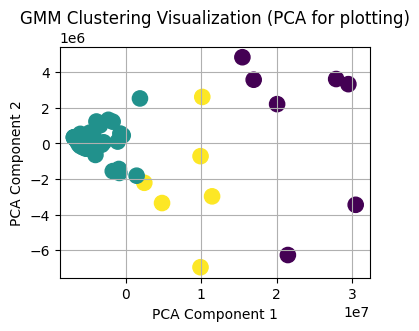

In [60]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

plt.figure(figsize=(4,3))
plt.scatter(
    pca_result[:,0],
    pca_result[:,1],
    c=gmm_labels,
    cmap='viridis',
    s=120
)
plt.title("GMM Clustering Visualization (PCA for plotting)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()